## 3. Data Analyzing

### 3.1. Import Libraries

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

First, let's read our final data in to dataframe

In [233]:
ds_survey_df = pd.read_csv('../Dataset/final_data.csv')
ds_survey_df.head()

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10352\121045001.py:1: DtypeWarning: Columns (208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  ds_survey_df = pd.read_csv('../Dataset/final_data.csv')


,Duration (in seconds),Age,Gender,Residential country,Student?,DS Platform (Coursera),DS Platform (edX),DS Platform (Kaggle Learn Courses),DS Platform (DataCamp),DS Platform (Fast.ai),...,Favorite media sources (Reddit),Favorite media sources (Kaggle),Favorite media sources (Course Forums),Favorite media sources (YouTube),Favorite media sources (Podcasts),Favorite media sources (Blogs),Favorite media sources (Journal Publications),Favorite media sources (Slack),Favorite media sources (None),Favorite media sources (Other)
0,121.0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462.0,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293.0,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851.0,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232.0,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


### 3.2. Asking Meaningful Questions

#### 3.2.1 First Question

**A possible question is:** Is there any correlation between reported proficiency in programming languages and the number of years of programming experience and do participants with more experience tend to use more programming languages?

**Answering this question** will help us to know more about the skill diversity in the surveyed population. The analysis helps discern if individuals with more experience tend to be proficient in a wider array of languages.

**How we answer this question**: 

#### 3.2.2. Pre-processing And Analyzing Data

##### Pre-processing

Programming Language

In [234]:
programming_language_df = ds_survey_df.loc[:,'Programming language (Python)':'Programming language (Other)']

programming_language_count = programming_language_df.count()

print("Count of programming languages reported by participants:\n" + programming_language_count.to_string())

Count of programming languages reported by participants:
Programming language (Python)        18653
Programming language (R)              4571
Programming language (SQL)            9620
Programming language (C)              3801
Programming language (C#)             1473
Programming language (C++)            4549
Programming language (Java)           3862
Programming language (JavaScript)     3489
Programming language (Bash)           1674
Programming language (PHP)            1443
Programming language (MATLAB)         2441
Programming language (Julia)           296
Programming language (Go)              322
Programming language (None)            256
Programming language (Other)          1342


Distribution Of Programming Languages

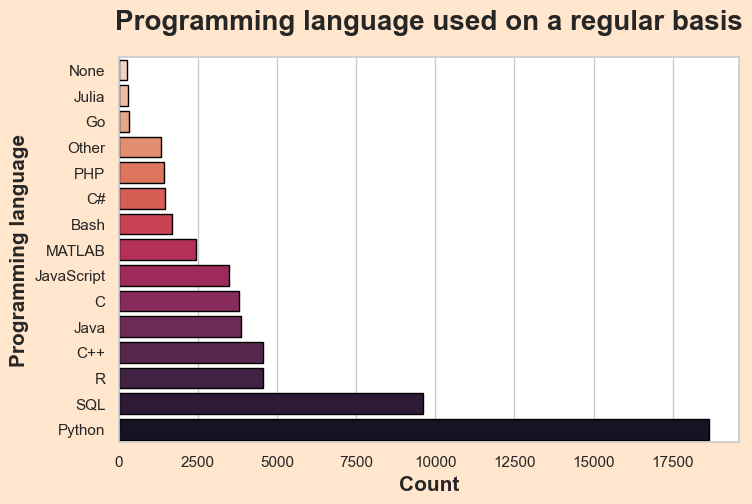

In [235]:
sorted_count = programming_language_count.sort_values(ascending = True)
languge = sorted_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = languge[0], x = sorted_count.values, palette ='rocket_r', edgecolor='black')

plt.title('Programming language used on a regular basis', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Programming language', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

Programming Experience

In [236]:
exp_year_df = ds_survey_df['Programming experience']
count_exp_year_df = exp_year_df.value_counts()


Distribution Of Programming Experience

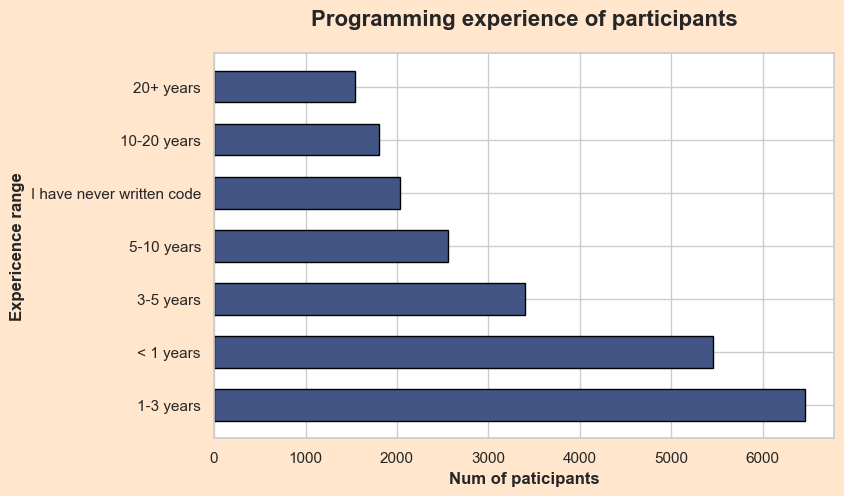

In [237]:
count_exp_year_df.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_exp_year_df.keys(), count_exp_year_df, edgecolor = 'black', color = '#435585', height = 0.6)
plt.xlabel('Num of paticipants', fontweight = 'bold')
plt.ylabel('Expericence range', fontweight = 'bold')
plt.title('Programming experience of participants', fontsize = '16', fontweight = 'bold', pad = '20')

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

Like you see we should encode the "Programming Experiece" categories into seperate columns for better analysis. This will allow you to directly see the correlation between reported proficiency in each programming language and each specific category of programming experience.

In [250]:
exp_year_df = pd.get_dummies(exp_year_df)

print("Count of programming experience reported by participants:\n" + count_exp_year_df.to_string())

Count of programming experience reported by participants:
1-3 years                    6459
< 1 years                    5454
3-5 years                    3399
5-10 years                   2556
I have never written code    2037
10-20 years                  1801
20+ years                    1537


##### Analysis

Converting programming language variables to numerical counts

In [239]:
programming_language_df = programming_language_df.applymap(lambda x: 1 if pd.notnull(x) else 0)

We can make the DataFrame to include only the relevant rows and columns in the order I want.

In [243]:
language_order = [
    'Programming language (Python)',
    'Programming language (R)',
    'Programming language (SQL)',
    'Programming language (C)',
    'Programming language (C#)',
    'Programming language (C++)',
    'Programming language (Java)',
    'Programming language (JavaScript)',
    'Programming language (Bash)',
    'Programming language (PHP)',
    'Programming language (MATLAB)',
    'Programming language (Julia)',
    'Programming language (Go)',
    'Programming language (None)',
    'Programming language (Other)'
]

# experience_order = [
#     '1-3 years',
#     '< 1 years',
#     '3-5 years',
#     '5-10 years',
#     'I have never written code',
#     '10-20 years',
#     '20+ years'
# ]

experience_order = [
    'I have never written code',
    '< 1 years',
    '1-3 years',
    '3-5 years',
    '5-10 years',
    '10-20 years',
    '20+ years'
]

exp_year_df = exp_year_df[experience_order].reindex(columns=experience_order)


For those in the column **I have never written code**, we will not need to draw on the plot and leave their default value as 0. Because someone who has never written code cannot have programming experience.

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_10352\1750524047.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_cycle = cycle(plt.cm.get_cmap('tab20', len(language_order)).colors)


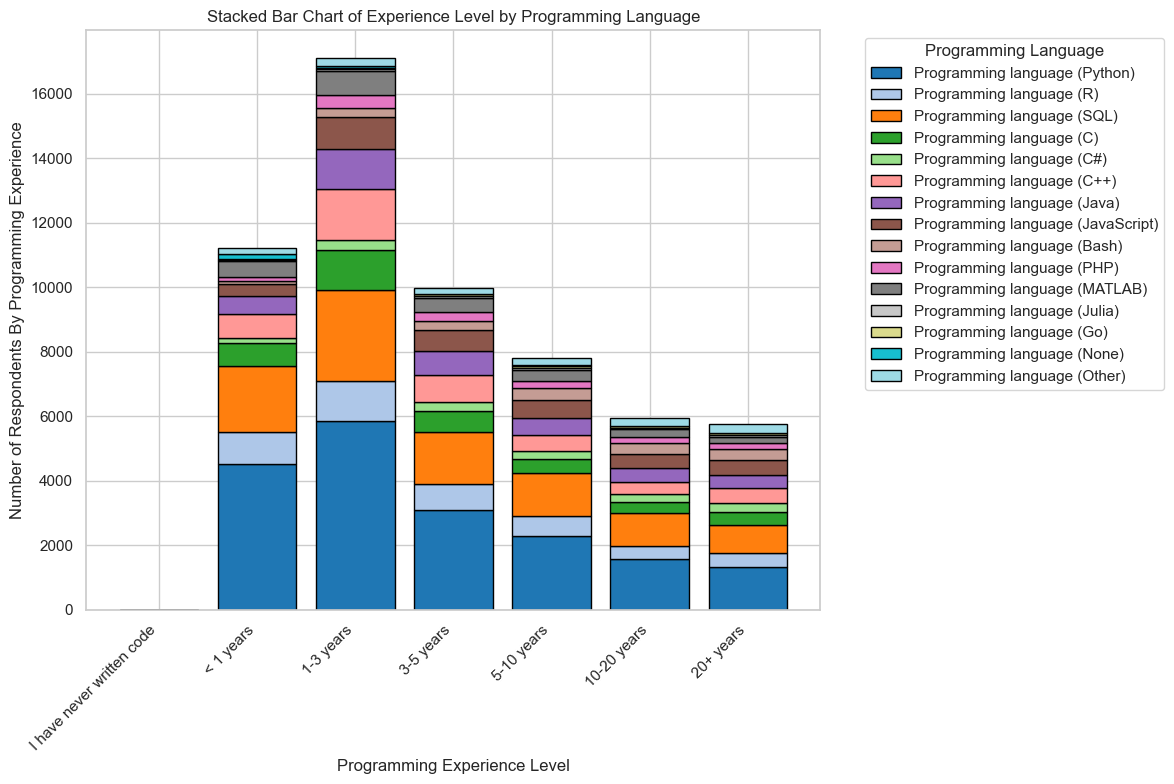

In [249]:
# Create a stacked bar chart with diverse colors and black edges for each language
plt.figure(figsize=(12, 8))
bottoms = None

# Define a diverse color cycle using itertools.cycle
color_cycle = cycle(plt.cm.get_cmap('tab20', len(language_order)).colors)

# Dictionary to store counts for each language
language_counts_by_year = {}

for language in language_order:
    counts = exp_year_df.mul(programming_language_df[language], axis=0).sum()
    language_counts_by_year[language] = counts
    color = next(color_cycle)
    plt.bar(experience_order, counts, label=f'{language}', bottom=bottoms, color=color, edgecolor='black')

    if bottoms is None:
        bottoms = counts
    else:
        bottoms += counts

# # In ra và vẽ stacked bar chart cho phân phối của từng ngôn ngữ lập trình trong nhóm kinh nghiệm "20+ years"
# bottoms = None

# for language in language_order:
#     counts = exp_year_df.mul(programming_language_df[language], axis=0).sum()
#     language_counts_by_year[language] = counts
#     color = next(color_cycle)
#     plt.bar('20+ years', counts['20+ years'], color=color, edgecolor='black', bottom=bottoms)

#     if bottoms is None:
#         bottoms = counts['20+ years']
#     else:
#         bottoms += counts['20+ years']

plt.xlabel('Programming Experience Level')
plt.ylabel('Number of Respondents By Programming Experience')
plt.title('Stacked Bar Chart of Experience Level by Programming Language')
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Answer The Question
- There are some clues that suggest that there may be a correlation. For example, the most popular languages, such as Python and SQL, are also the languages with the most experienced users. 

- In the span of **<1 year** to **1-3 years**, the number of people using programming languages increased significantly, the languages used that contributed greatly to that growth were **Python, SQL, C++**...

- **Python and SQL** stands out as the most popular language for both beginners and experienced individuals, reflecting a general trend in the programming community.

- It is difficult to say whether there is a trend for more experienced programmers to use more languages because almost all programming languages appear in all bars in the plot.